In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

## Movies Dataset

In [2]:
#Read in movie data
movies = pd.read_csv('../ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
print(f'Number of movies: {len(movies)}')

Number of movies: 9742


In [4]:
genres = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
          'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 
          'Sci-Fi', 'Thriller', 'War', 'Western', '(no genres listed)']

In [5]:
#Add column for each genre
movies_genres = movies.reindex(columns = movies.columns.tolist() + genres, fill_value = 0)

In [6]:
#Fill in the genres for each movie
for i in range(len(movies_genres)):
    for genre in movies_genres['genres'][i].split('|'):
        movies_genres.loc[i, genre] = 1

movies_genres.drop(['genres'], axis = 1, inplace = True) #Remove bar separated genres column

movies_genres.head(3)

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,(no genres listed)
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


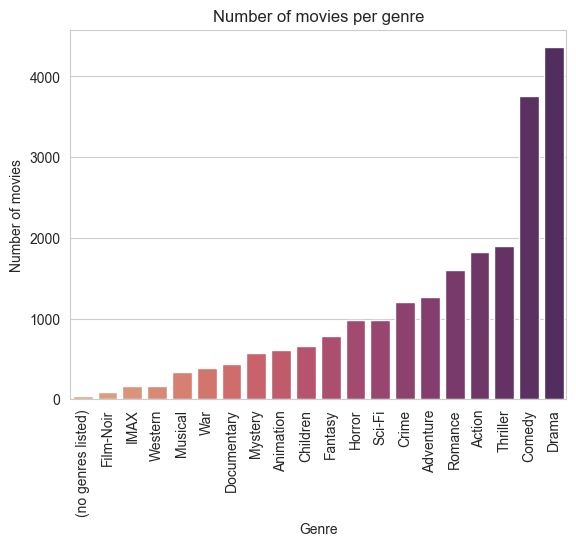

In [7]:
#Show number of movies per genre
sns.set_style('whitegrid')
genre_sums = movies_genres[genres].sum().sort_values()
genre_sum_plot = sns.barplot(data=genre_sums, x=genre_sums.index, y=genre_sums.values, 
                             palette='flare')
genre_sum_plot.set_xticklabels(genre_sums.index, rotation=90)
plt.ylabel('Number of movies')
plt.xlabel('Genre')
plt.title('Number of movies per genre')
plt.show()

In [8]:
#Extract year from title
movies_genres['year'] = movies_genres['title'].str.strip().str.extract(r'\((\d{4})\)$')

#Fill NaN values in year column with 0
movies_genres['year'] = movies_genres['year'].fillna(0)

#Cast year column to int
movies_genres['year'] = movies_genres['year'].astype(int)

In [9]:
#Show the movies with missing year
movies_genres.loc[movies_genres['year'] == 0, ['movieId', 'title', 'year']]

,movieId,title,year
6059,40697,Babylon 5,0
9031,140956,Ready Player One,0
9091,143410,Hyena Road,0
9138,147250,The Adventures of Sherlock Holmes and Doctor W...,0
9179,149334,Nocturnal Animals,0
9259,156605,Paterson,0
9367,162414,Moonlight,0
9448,167570,The OA,0
9514,171495,Cosmos,0
9515,171631,Maria Bamford: Old Baby,0


In [10]:
#Manually fill in year for movies with year = 0
movies_genres.loc[6059, 'year'] = 1993 #Babylon 5, TV series from 1993-1998
movies_genres.loc[9031, 'year'] = 2018 #Ready Player One
movies_genres.loc[9091, 'year'] = 2015 #Hyena Road
movies_genres.loc[9138, 'year'] = 1980 #Sherlock Holmes, episode aired Sep 1980
movies_genres.loc[9179, 'year'] = 2016 #Nocturnal Animals
movies_genres.loc[9259, 'year'] = 2016 #Paterson
movies_genres.loc[9367, 'year'] = 2016 #Moonlight
movies_genres.loc[9448, 'year'] = 2016 #The OA, TV series from 2016-2019
movies_genres.loc[9514, 'year'] = 1980 #Cosmos, Miniseries 1980
movies_genres.loc[9515, 'year'] = 2017 #Maria Bamford: Old Baby
movies_genres.loc[9518, 'year'] = 2006 #Death Note, TV series from 2006-2007
movies_genres.loc[9525, 'year'] = 2017 #Generation Iron 2
movies_genres.loc[9611, 'year'] = 2011 #Black Mirror

movies_genres[movies_genres['year'] == 0]

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,(no genres listed),year


In [11]:
#Remove (no genres listed) since its value is captured by the missing values of all other genres
movies_genres.drop(['(no genres listed)'], axis = 1, errors='ignore', inplace = True)
try:
    genres.remove('(no genres listed)') #Remove (no genres listed) from list of genres
except ValueError:
    pass

In [12]:
#Show the count of movies with each number of genres
movies_genres[genres].sum(axis=1).value_counts().sort_index()

0       34
1     2817
2     3218
3     2338
4      987
5      271
6       63
7       12
8        1
10       1
dtype: int64

In [13]:
#Describe the movie years
movies_genres['year'].describe()

count    9742.000000
mean     1994.631185
std        18.535643
min      1902.000000
25%      1988.000000
50%      1999.000000
75%      2008.000000
max      2018.000000
Name: year, dtype: float64

In [14]:
earliest_movie_year = movies_genres['year'].min()
latest_movie_year = movies_genres['year'].max()

print(f'Movies from the year {earliest_movie_year} to {latest_movie_year}')

Movies from the year 1902 to 2018


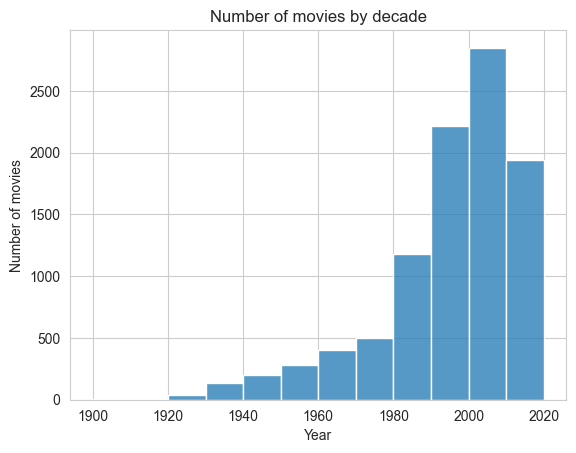

In [15]:
#Show histogram of movies by decade
bins = [i for i in range(1900, 2021, 10)]
sns.histplot(data=movies_genres, x='year', bins=bins)
plt.title('Number of movies by decade')
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.show()

In [16]:
#Save the movie data with encoded genres and years column
movies_genres.to_csv('../cleaned_data/movies_with_years_genres.csv', index = False)
print('Movie data with encoded genres  and years column saved to cleaned_data folder.')

Movie data with encoded genres  and years column saved to cleaned_data folder.


## Movies with iMDb Data

## Ratings Dataset

In [17]:
#Read in ratings data
ratings = pd.read_csv('../ml-latest-small/ratings.csv')
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [18]:
#Remove timestamp column
ratings.drop('timestamp', axis = 1, inplace = True)

In [19]:
unique_raters = ratings['userId'].nunique()
unique_movies = ratings['movieId'].nunique()

print(f'{unique_raters} users have rated {unique_movies} different movies.')

610 users have rated 9724 different movies.


In [20]:
#Show which movies were not rated by any users
movies_not_rated = movies[~movies['movieId'].isin(ratings['movieId'])]
movies_not_rated

,movieId,title,genres
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller
2211,2939,Niagara (1953),Drama|Thriller
2499,3338,For All Mankind (1989),Documentary
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War
4037,5721,"Chosen, The (1981)",Drama
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance
4598,6849,Scrooge (1970),Drama|Fantasy|Musical
4704,7020,Proof (1991),Comedy|Drama|Romance
5020,7792,"Parallax View, The (1974)",Thriller


In [21]:
#Create a dataframe with each user's average rating and number of ratings
users_average_rating = ratings.groupby('userId')['rating'].agg(['mean', 'count']).sort_index()
users_average_rating.columns = ['average_rating', 'number_of_ratings']
users_average_rating.describe()

,average_rating,number_of_ratings
count,610.000000,610.000000
mean,3.657222,165.304918
std,0.480635,269.480584
min,1.275000,20.000000
25%,3.360000,35.000000
50%,3.694385,70.500000
75%,3.997500,168.000000
max,5.000000,2698.000000


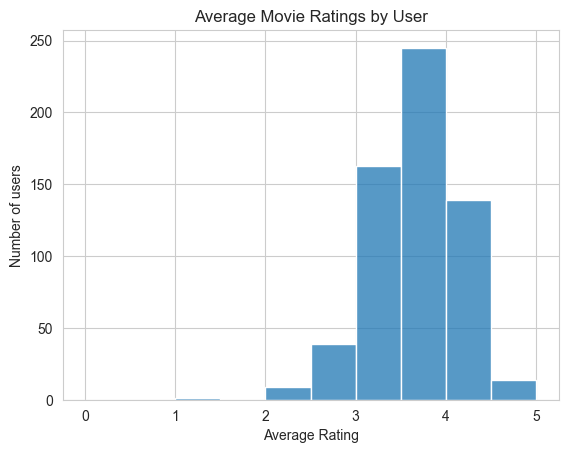

In [22]:
#Show histogram of average ratings by user
ratings_bins = [i/2 for i in range(0, 11)]
sns.histplot(data=users_average_rating, x='average_rating', bins=ratings_bins)
plt.title('Average Movie Ratings by User')
plt.xlabel('Average Rating')
plt.ylabel('Number of users')
plt.show()

In [23]:
#Create a dataframe with each movie's average rating and number of ratings
movies_average_rating = ratings.groupby('movieId')['rating'].agg(['mean', 'count']).sort_index()
movies_average_rating.columns = ['average_rating', 'number_of_ratings']
movies_average_rating.describe()

,average_rating,number_of_ratings
count,9724.000000,9724.000000
mean,3.262448,10.369807
std,0.869874,22.401005
min,0.500000,1.000000
25%,2.800000,1.000000
50%,3.416667,3.000000
75%,3.911765,9.000000
max,5.000000,329.000000


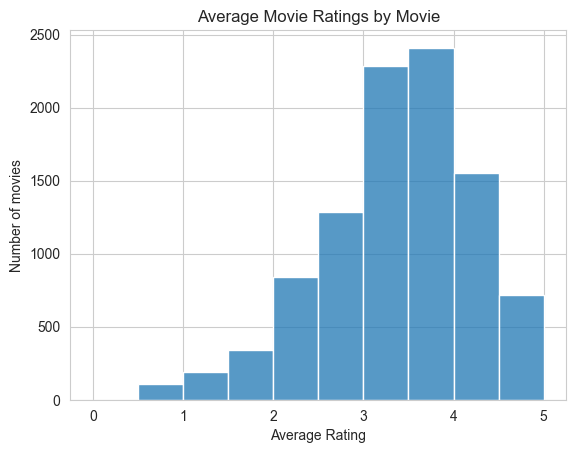

In [24]:
#Show histogram of average ratings by movie
sns.histplot(data=movies_average_rating, x='average_rating', bins=ratings_bins)
plt.title('Average Movie Ratings by Movie')
plt.xlabel('Average Rating')
plt.ylabel('Number of movies')
plt.show()

In [25]:
#Add the average rating and number of ratings for each movie to the movie_genres dataframe
movies_with_rating_info = pd.merge(movies_genres, movies_average_rating, on = 'movieId')
movies_with_rating_info.head(1)

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,average_rating,number_of_ratings
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1995,3.92093,215


In [26]:
#Find the number of reviews and average rating for each genre
movies_copy = movies_with_rating_info.copy()
for genre in genres:
    movies_copy[genre] = movies_copy[genre] * movies_copy['average_rating'] * movies_copy['number_of_ratings']
movies_melted = pd.melt(movies_copy, id_vars=['title', 'number_of_ratings'], value_vars=genres, var_name='genre', value_name='ratings').loc[lambda x:x['ratings'] != 0]
genres_rating = movies_melted.groupby('genre')[['number_of_ratings', 'ratings']].sum().reset_index()
genres_rating['weighted_average'] = genres_rating['ratings'] / genres_rating['number_of_ratings']

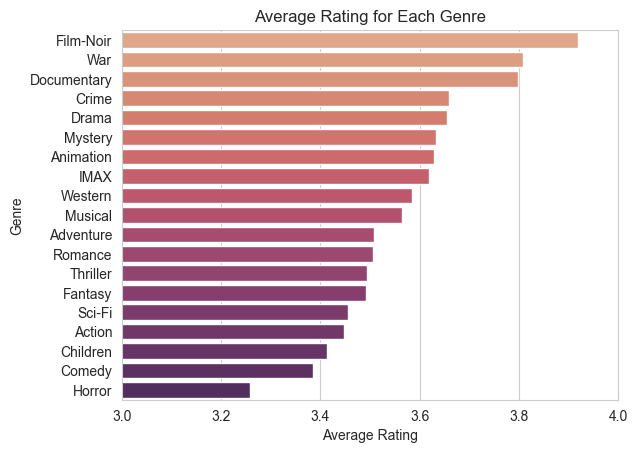

In [27]:
#Show the average rating for each genre
sns.barplot(data=genres_rating.sort_values('weighted_average', ascending=False), x='weighted_average', y='genre', palette='flare')
plt.xlim(3.0, 4.0)
plt.title('Average Rating for Each Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

In [28]:
#Add the movie info to the ratings dataframe
ratings_with_movie_info = ratings.merge(movies_genres, on = 'movieId').sort_values(['userId', 'movieId'])
ratings_with_movie_info.head(1)

,userId,movieId,rating,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,1,4.0,Toy Story (1995),0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1995
